#**MNIST Classification Task**

**시작 전 [런타임] > [런타임 유형 변경] > [하드웨어 가속기] > [GPU] 선택**

<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>
[MNIST Examples]

In [ ]:
# Import required libraries

from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision import datasets, transforms
from torch.autograd import Variable


In [ ]:
# Variables

args = {}
kwargs = {}
args['batch_size'] = 1000 # Batch size
args['test_batch_size'] = 1000 # Test batch size
args['epochs'] = 10  # The number of epochs is the number of times you go through the full dataset.
args['lr'] = 0.01 # Learning rate is how fast it will decend.

args['seed'] = 1 # random seed
args['log_interval'] = 10 # log interval
args['cuda'] = True # GPU cuda enable


In [ ]:
# Load the MNIST data

# Train loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.,), (1.,))
                   ])),
    batch_size=args['batch_size'], shuffle=True, **kwargs)

# Test loader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.,), (1.,))
                   ])),
    batch_size=args['test_batch_size'], shuffle=True, **kwargs)


In [ ]:
# Network architecture

class Net(nn.Module):
    # Define the structure of CNN.

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.fc1 = nn.Linear(500, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # Convolution Layer > Activation Layer > Pooling Layer
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)

        # Convolution Layer > Activation Layer > Pooling Layer
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 500)

        # Fully Connected Layer > Activation Layer
        x = F.relu(self.fc1(x))

        # Fully Connected Layer > Activation Layer
        x = self.fc2(x)

        # Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


#**Assignment 2-1**

**LeNet5 모델 구현하기**

*   아래 ***class LeNet*** 안에 LeNet-5 코드 구현하기.
*   다음 components들을 활용할 것: ***nn.Conv2d***, ***nn.Linear***, ***torch.tanh***, ***F.avg_pool_2d***, ***F.log_softmax***

\

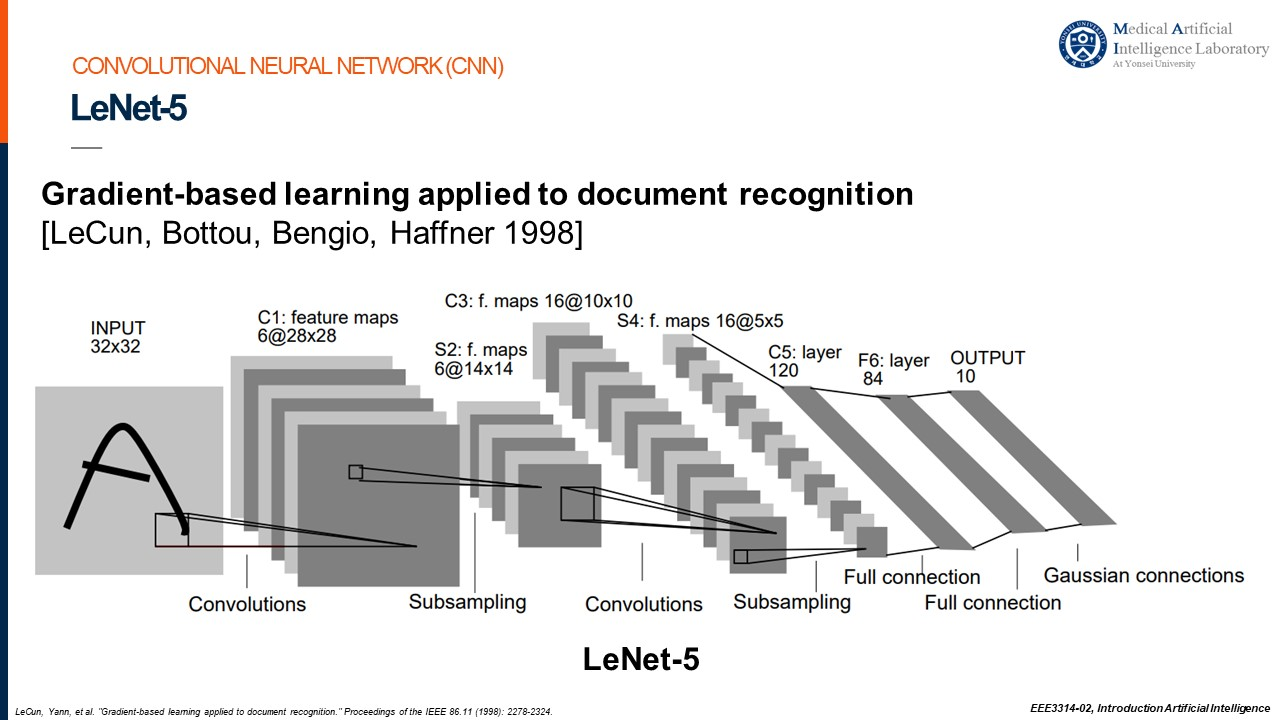


In [ ]:
### Implement your code ###

class LeNet(nn.Module):
    # Define the structure of the LeNet

    def __init__(self):
        super(LeNet, self).__init__()
        #

    def forward(self, x):
        #

        return


In [ ]:
# Classes
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')


In [ ]:
# Definition of train

def train(epoch):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        # Cuda variable
        if args['cuda']:
            data, target = data.cuda(), target.cuda()

        # Pytorch variables
        data, target = Variable(data), Variable(target)

        # zero_grad() will zero out the gradients for this batch.
        optimizer.zero_grad()

        # The defined model generates the output.
        output = model(data)

        # Calculate the loss (negative log likelihood loss).
        loss = F.nll_loss(output, target)

        # Loss backpropagation
        loss.backward()

        # To do a one-step update on our parameter.
        optimizer.step()

        # Print out the logs periodically
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data))


In [ ]:
# Definition of test

def test(print_class_accuracy):
    model.eval()

    # Initilize the variables
    test_loss = 0
    correct = 0
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # torch.no_grad() for test
    with torch.no_grad():
      for data, target in test_loader:
          # Cuda variable
          if args['cuda']:
              data, target = data.cuda(), target.cuda()

          # The trained model generates the output.
          output = model(data)

          # Calculates the test loss
          test_loss += F.nll_loss(output, target, reduction='sum').data # sum up batch loss

          # Get the index of the max log-probability
          pred = output.data.max(1, keepdim=True)[1]
          correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

          # Calculate the accuracy for each class
          for label, prediction in zip(target, pred):
            if label == prediction:
              correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

      test_loss /= len(test_loader.dataset)

      # Print out the logs periodically
      print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))
      
      # Print out the accuracy for each class
      if print_class_accuracy == True:
        for classname, correct_count in correct_pred.items():
          accuracy = 100 * float(correct_count) / total_pred[classname]
          print("Accuracy for class {:s}: {:d}/{:d} ({:.1f}%)".format(classname,correct_count,total_pred[classname],accuracy))


In [ ]:
# Select the model

model = Net()
#model = LeNet()

In [ ]:
# GPU usage
if args['cuda']:
    model.cuda()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train & Test for defined epochs
for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test(print_class_accuracy=False)


In [ ]:
# Accuracy for each class

test(print_class_accuracy = True)

In [ ]:
# Test data shape

for data, target in test_loader:
  print(data.shape)

In [ ]:
target[0:40]

In [ ]:
# imshow function

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
imshow(torchvision.utils.make_grid(data[0:40,...]))

In [ ]:
output = model(data.cuda())
pred = output.data.max(1, keepdim=True)[1]

In [ ]:
torch.reshape(pred.cpu()[0:40],(5,8))

In [ ]:
torch.reshape(target[0:40],(5,8))

\


#**Assignment 2-2**



1.   직접 손으로 쓴 digit (0~9) load해서 이미지로 plot하기 (각 class당 10개 X 10개 class = 100개 digits)
  *   손으로 쓴 digits들을 10 X 10 grid 형태의 이미지로 plot 하기.
  *   가능하면 다른 글씨체, 스타일, 다른 필기도구 등으로 써서 성능을 파악하는 것이 목적.


2.   앞에서 학습시킨 MNIST Classification 모델에 테스트해서 Accuracy 수치 확인.
3.   위 2)번 Accuracy를 향상시키기 위한 본인만의 방법 제시 및 향상된 테스트 Accuracy 수치 제시
  *  예시) CNN 모델 수정, 영상 전처리(pre-processing) 추가 등
  *  추가하거나 수정한 코드 부분에는 주석으로 설명을 작성해야 함.


In [ ]:
# Google Drive mount

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
### 1) Load and plot your written digits here ###




In [ ]:
### 2) Print test accuracy with your written digits here ###




In [ ]:
### 3) Suggest your methods to improve the test accuracy with your written digits ###


